# Project 1

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

## Task 1

In [2]:
N_states = 5
P = np.array([
    [0.9915, 0.005,  0.0025, 0,     0.001 ],
    [0,      0.986,  0.005,  0.004, 0.005 ],
    [0,      0,      0.992,  0.003, 0.005 ],
    [0,      0,      0,      0.991, 0.009 ],
    [0,      0,      0,      0,     1     ]
])

In [ ]:
# states:
# 0 - well
# 1 - local recurence 
# 2 - distant metastasis
# 3 - both 1 and 2
# 4 - death

n_patients = 1000

patients = [0] * n_patients

iterations = [[p for p in patients]]

while not all(p == 4 for p in patients):
    for i, p in enumerate(patients):
        trans_prob = P[p]
        patients[i] = np.random.choice(5, p=trans_prob)
    iterations.append([p for p in patients])

995

In [4]:
counts = np.zeros((len(iterations), N_states))

for i, it in enumerate(iterations):
    idx, c = np.unique(it, return_counts=True)
    counts[i, idx] = c

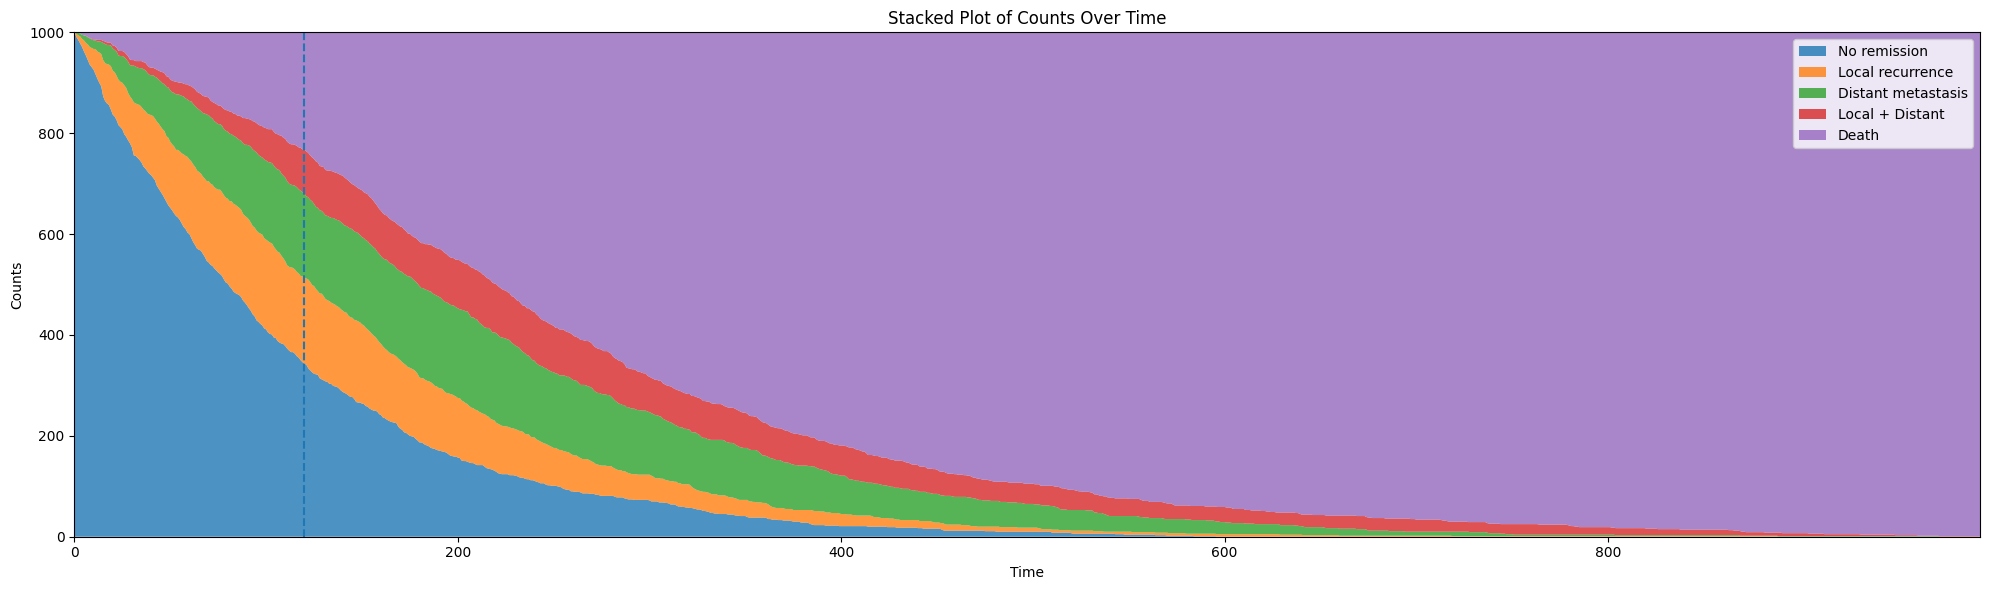

In [10]:
x = np.arange(counts.shape[0])
y = counts.T  # shape should be (n_states, n_timesteps)

labels = [
    "No remission",
    "Local recurrence",
    "Distant metastasis",
    "Local + Distant",
    "Death",
]

t = 120

fig, ax = plt.subplots(1, 1, figsize=(20, 6))

ax.stackplot(x, y, alpha=0.8, labels=labels)
ax.set_xlim(0, counts.shape[0] - 1)
ax.set_ylim(0, n_patients)
ax.set_xlabel("Time")
ax.set_ylabel("Counts")
ax.set_title("Stacked Plot of Counts Over Time")
ax.axvline(t, linestyle="--")
ax.legend(loc="upper right")
fig.tight_layout()
plt.show()

## Task 2

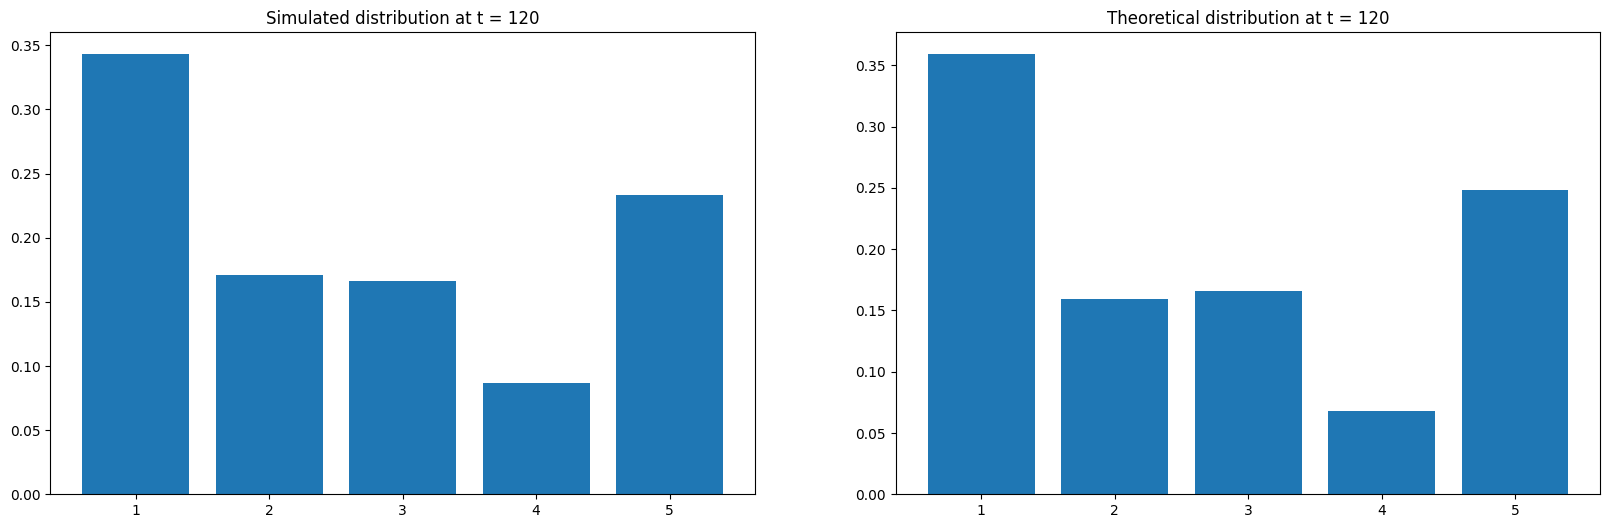

In [11]:
p_simulated = counts[t] / n_patients
p_theoretical = np.array([1, 0, 0, 0, 0]).reshape(1, -1) @ np.linalg.matrix_power(P, t)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
ax1.bar(np.arange(1, N_states + 1), p_simulated)
ax1.set_title(f"Simulated distribution at {t = }")
ax2.bar(np.arange(1, N_states + 1), p_theoretical.reshape(-1))
ax2.set_title(f"Theoretical distribution at {t = }")
plt.show()

## Task 3

In [20]:
pi = np.array([1, 0, 0, 0]).reshape(1, -1)
P_s = P[:-1, :-1]
p_s = P[:-1, -1]

lifetimes = []

for i in range(n_patients):
    lifetime = 0 # noone is dead at t=0, given pi
    while True:
        lifetime += 1
        if iterations[lifetime][i] == 4:
            break
    lifetimes.append(lifetime)

lifetimes = np.array(lifetimes)

In [24]:
theoretical_mean = pi @ np.linalg.inv(np.identity(N_states - 1) - P_s) @ np.ones(N_states - 1).reshape(-1, 1)
theoretical_mean = theoretical_mean.item()
simulated_mean = np.mean(lifetimes)

In [ ]:
t = np.arange(0, np.max(lifetimes) + 1)
theoretical_mass = np.zeros_like(t).astype(float)

P_s_t = np.identity(N_states - 1)
for i in range(np.max(lifetimes)):
    theoretical_mass[i] = (pi @ P_s_t @ p_s).item()
    P_s_t = P_s_t @ P_s

np.float64(0.002601582110283617)

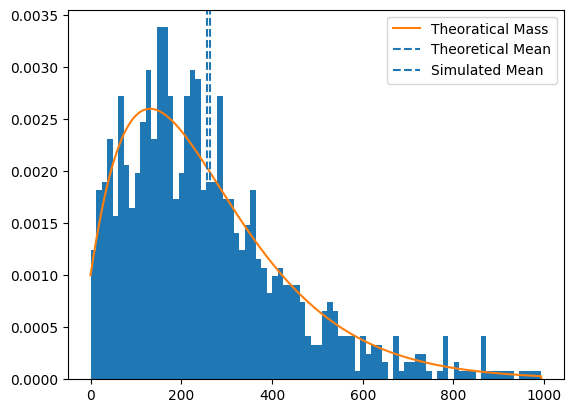

In [39]:
plt.hist(lifetimes, density=True, bins=np.max(lifetimes) // 12)
plt.plot(t, theoretical_mass, label="Theoratical Mass")
plt.gca().axvline(theoretical_mean, linestyle="--", label="Theoretical Mean")
plt.gca().axvline(simulated_mean, linestyle="--", label="Simulated Mean")
plt.legend()

## Task 4

In [ ]:
# "early rejection" - only events in the first 12 months dictate wether a sample should be accepted
# therefore, simulate the first 12 months and reject from there, then complete simulation

patients = []
while len(patients) < 1000:
    state = 0
    for _ in range(12):
        state = np.random.choice(5, p=P[state])

    if state not in [0, 4]: # not dead, but has some kind of remission
        patients.append(state)


lifetimes = []
for state in patients:
    lifetime = 12 # we already simulated 12 steps
    while state != 4:
        state = np.random.choice(5, p=P[state])
        lifetime += 1
    lifetimes.append(lifetime)

lifetimes = np.array(lifetimes)

In [44]:
# maybe add bootstrap estimate?
print(f"Mean lifetime (months): {np.mean(lifetimes):.2f}")

Mean lifetime (months): 172.65


## Task 5

In [ ]:
# takes ~3 mins to run...
n_iterations = 100
n_patients = 200

lifetimes = np.empty((n_iterations, n_patients))

for i in range(n_iterations):
    for j in range(n_patients):
        lifetime = 0
        state = 0
        while state != 4:
            state = np.random.choice(5, p=P[state])
            lifetime += 1
        lifetimes[i, j] = lifetime

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


array([[227., 228., 475., ...,  83., 143., 263.],
       [381., 319., 419., ..., 221., 267., 163.],
       [299., 175.,  72., ...,  67., 120., 554.],
       ...,
       [ 89.,  52., 397., ..., 340.,  53., 192.],
       [268.,  62., 129., ..., 281., 327.,  69.],
       [ 87., 628., 480., ...,  17., 426.,  13.]], shape=(100, 200))

In [66]:
ps = np.mean(lifetimes <= 350, axis=1)
print("Crude estimator:")
print(f"Mean: {ps.mean():.4f}")
print(f"Std:  {ps.std():.4f}")

Crude estimator:
Mean: 0.7382
Std:  0.0285


In [69]:
mean_lifetimes = np.mean(lifetimes, axis=1)
mean_mean_lifetime = np.mean(mean_lifetimes)

cov = np.cov(ps, mean_lifetimes)

var_p = cov[0, 0]
var_lt = cov[1, 1]
cov_p_lt = cov[0, 1]

# calculate c to minimze variance of estimator 
# based on estimated variances/covariances
c = - cov_p_lt / var_lt

zs = ps + c * (mean_lifetimes - mean_mean_lifetime)

print(f"Control variates ({c = :.5f}):")
print(f"Mean: {zs.mean():.4f}")
print(f"Std:  {zs.std():.4f}")

Control variates (c = 0.00173):
Mean: 0.7382
Std:  0.0201


## Task 6

Main assumption is that transitions only occur once a month.